In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기 - 경진대회에서만 사용
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

# 문장의 유사도 측정

## 코사인 함수를 직접 구현

In [10]:
# 코사인 유사도를 측정하는 함수 - api 로 제공됨..?
def cos_similarity(v1, v2) :
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity  = dot_product / l2_norm
    
    return similarity



In [6]:
# 샘플 데이터 생성
doc_list = ['i love you' , 'i like you', 'i love movie']

# 문장을 수치 데이터로 변환 - 피처 벡터화
# 영문은 바로 가능하고, 한글은 형태소 분석을 수행한 후 작업

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
feature_vect = tfidf_vect.fit_transform(doc_list)
print(feature_vect)
print(feature_vect.shape)

  (0, 3)	0.7071067811865476
  (0, 1)	0.7071067811865476
  (1, 0)	0.7959605415681652
  (1, 3)	0.6053485081062916
  (2, 2)	0.7959605415681652
  (2, 1)	0.6053485081062916
(3, 4)


In [7]:
# 밀집 행렬로 변환 - 희소 행렬은 거리 계산이 안됨
feature_vect_dense = feature_vect.todense()
print(feature_vect_dense)

[[0.    0.707 0.    0.707]
 [0.796 0.    0.    0.605]
 [0.    0.605 0.796 0.   ]]


In [11]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

print(cos_similarity(vect1, vect2))
print(cos_similarity(vect1, vect3))
print(cos_similarity(vect2, vect3))

0.4280460350631186
0.4280460350631186
0.0


## api 활용


In [12]:
# 거리를 측정할 벡터 2개를 대입
# api 에서는 희소 행렬을 대입하면 밀집행렬로 변환해서 유사도를 측정함
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity_value = cosine_similarity(feature_vect[0], feature_vect)
print(cos_similarity_value)

[[1.    0.428 0.428]]


In [ ]:
# 문서 군집이 이 원리를 이용해서 유사도 값이 큰 것까리 묶는 것입니다.

## 한글 유사도 측정

In [20]:
contents = [
    '안녕하세요 반갑습니다.', '나는 목도리를 잃어버렸습니다.', '나는 카드를 잃어버렸습니다.',
    '목도리를 찾아서 반가웠습니다.' ,'나는 카드로 과일을 샀습니다.', '나는 카드를 두고 나왔습니다.'
]

# 어근 추출
from konlpy.tag import Twitter
twitter = Twitter()
contents_tokens = [twitter.morphs(row) for row in contents]
print(contents_tokens)

print('======================================================================')

# from konlpy.tag import Okt
# okt = Okt()
# contents_tokens = [okt.morphs(row) for row in contents]
# print(contents_tokens)

[['안녕하세요', '반갑습니다', '.'], ['나', '는', '목도리', '를', '잃어버렸습니다', '.'], ['나', '는', '카드', '를', '잃어버렸습니다', '.'], ['목도리', '를', '찾아서', '반가웠습니다', '.'], ['나', '는', '카드', '로', '과일', '을', '샀습니다', '.'], ['나', '는', '카드', '를', '두고', '나왔습니다', '.']]


In [23]:
# 형태소 분석을 수행한 후 문장으로 변환
contens_for_vectorize = []

for content in contents_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    contens_for_vectorize.append(sentence)

print(contens_for_vectorize)

[' 안녕하세요 반갑습니다 .', ' 나 는 목도리 를 잃어버렸습니다 .', ' 나 는 카드 를 잃어버렸습니다 .', ' 목도리 를 찾아서 반가웠습니다 .', ' 나 는 카드 로 과일 을 샀습니다 .', ' 나 는 카드 를 두고 나왔습니다 .']


In [27]:
feature_vect = tfidf_vect.fit_transform(contens_for_vectorize)
print(tfidf_vect.get_feature_names_out())
print(feature_vect.toarray().transpose())

['과일' '나왔습니다' '두고' '목도리' '반가웠습니다' '반갑습니다' '샀습니다' '안녕하세요' '잃어버렸습니다' '찾아서'
 '카드']
[[0.    0.    0.    0.    0.635 0.   ]
 [0.    0.    0.    0.    0.    0.635]
 [0.    0.    0.    0.    0.    0.635]
 [0.    0.707 0.    0.502 0.    0.   ]
 [0.    0.    0.    0.612 0.    0.   ]
 [0.707 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.635 0.   ]
 [0.707 0.    0.    0.    0.    0.   ]
 [0.    0.707 0.764 0.    0.    0.   ]
 [0.    0.    0.    0.612 0.    0.   ]
 [0.    0.    0.645 0.    0.44  0.44 ]]


In [31]:
new_post = ['내 목도리 사자']

new_post_tokens = [twitter.morphs(row) for row in new_post]
print(new_post_tokens)
new_post_for_vectorize = []

for content in new_post_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
new_post_vec = tfidf_vect.transform(new_post_for_vectorize)
print(new_post_vec)

[['내', '목도리', '사자']]
  (0, 3)	1.0


In [33]:
cos_similarity_value = cosine_similarity(new_post_vec, feature_vect)
print(cos_similarity_value)

[[0.    0.707 0.    0.502 0.    0.   ]]


In [34]:
print(np.argmax(cos_similarity_value))

1


In [35]:
result = ['사과', '배', '한라봉' , '천혜향', '감귤']
text = result[np.argmax(cos_similarity_value)]
print(text)

배


# 네이버 지식인  문자열을 크롤링해서 연관 단어 추천

In [36]:
# 크롤링
from bs4 import BeautifulSoup # HTML 파싱
import urllib # 검색어 인코딩
import requests # html 가져오기
import time # 슬립을 사용하기 위해서

In [41]:
# 크롤링한 결과를 저정할 변수 
present_candi_text = []
url = 'https://search.naver.com/search.naver?ssc=tab.kin.kqna&where=kin&sm=tab_jum&query=' + \
urllib.parse.quote('화이트데이') + '&kin_start='

for n in range(1, 1000, 10) :
    # html 문자열 가져오기
    response = requests.get(url + str(n))
    
    # 파싱
    soup = BeautifulSoup(response.text, 'html.parser')
    tmp = soup.select('div.question_area > div > a')
    for line in tmp :
        present_candi_text.append(line.getText())
    time.sleep(0.5)


In [43]:
print(present_candi_text)

['화이트데이 이벤트 20대초반 커플이고 처음 맞는 화이트데이인데 이벤트 알려주세요', '화이트데이 띄어쓰기 맞춤법 밸런타인데이는 붙여서 쓰던데 화이트데이인가요 화이트 데이인가요… ㅠㅠ', '화이트데이 초콜릿줘야하나요 아니면 사탕줘야하나요? 화이트데이는 초콜릿을 주는건가요? 아니면 초콜릿을 주는건가요? 발렌타인데이는 초콜릿주는걸로 알고 있는데 화이트데이는 잘 몰라서요! 3/14 화이트데이 초콜릿은 주는건지 사탕 주는건지 알려주세요!', '화이트데이 선물 벌써 이번 화이트데이가 다음주 이더라구요 발렌타인데이에 여자친구에게 수제 과일? 초콜릿을 받았습니다 곧 화이트데이가 다가오는데 뭘 사야될지 모르겠어요.. 지금 현재 고등학생이고 부담되지 않을 만한 선물 추천부탁 드립니다 (저는 간식 쪽으로 생각해 보고있어요)', '군인 남친 화이트데이 군대에 있는 남친한테 화이트데이 선물 보내고 싶은데 뭐가 좋을까요?? 그리고 카카오선물 버내도 배송 되나요??', '발렌타인데이 화이트 데이 차이 발렌타인 데이랑 화이트 데이 차이점이 뭐죵? 여자가 남자한테 주고 남자가 여자한테 주고 차이인가용 그럼 어느날이 여자가 주고 어떤 날이 남자가 주는건가요', '여자친구 화이트데이 선물 추천 저는 고등학생 3학년입니다.곧 화이트데이라서 여자친구 선물을 주고 싶어요 화장품은 너무 흔한거 같고... 기억에 남을만한 선물 추천 좀 해주세요 볼때마다 제 생각나는 선물이 좋습니다', '화이트데이 선물 추천 좋아하는 학교 선배한테 화이트데이날 선물 주고싶은데요. 고등학교 여학생이 좋아할만한 가격 부담스럽지 않은 선물 뭐가 있을까요? 시간이 많이 남기도 했고 드려도 될지 모르겠는데 좋아하실지 모르겠습니다.', '화이트데이 후배 선물 내일 화이트데이 잖아요 그래서 작년부터 친하게 지내던 후배 여동생한테 소소한 선물 아닌 선물 주려하는데 어떤거 주는게 좋을까요 뭐든 챙겨주면 좋아하는 성격이에요 고민이에요 ㅠㅠ 둘 다 고등학생이고 한 살 차이 납니다(제가 3개월째 짝사랑중ㅎ)', '화이트데이 오늘은 화이트

In [46]:
from konlpy.tag import Twitter

twitter = Twitter()

present_text = ''

for each_line in present_candi_text :
    present_text = present_text + each_line + '\n'
    
tokens_ko = twitter.morphs(present_text)
print(tokens_ko)

['화이트데이', '이벤트', '20', '대', '초반', '커플', '이고', '처음', '맞는', '화이트데이', '인데', '이벤트', '알려주세요', '\n', '화이트데이', '띄어쓰기', '맞춤법', '밸런타인데이', '는', '붙여서', '쓰던데', '화이트데이', '인가요', '화이트', '데이', '인가요', '…', 'ㅠㅠ', '\n', '화이트데이', '초콜릿', '줘야하나요', '아니면', '사탕', '줘야하나요', '?', '화이트데이', '는', '초콜릿', '을', '주는건', '가요', '?', '아니면', '초콜릿', '을', '주는건', '가요', '?', '발렌타인데이', '는', '초콜릿', '주', '는걸', '로', '알', '고', '있는데', '화이트데이', '는', '잘', '몰라서요', '!', '3/14', '화이트데이', '초콜릿', '은', '주는', '건지', '사탕', '주는', '건지', '알려주세요', '!', '\n', '화이트데이', '선물', '벌써', '이번', '화이트데이', '가', '다음주', '이더라구요', '발렌타인데이', '에', '여자친구', '에게', '수제', '과일', '?', '초콜릿', '을', '받았습니다', '곧', '화이트데이', '가', '다가오는데', '뭘', '사야', '될지', '모르겠어요', '..', '지금', '현재', '고등학생', '이고', '부담', '되지', '않을', '만', '한', '선물', '추천', '부탁', '드립니다', '(', '저', '는', '간식', '쪽', '으로', '생각', '해', '보고있어요', ')', '\n', '군인', '남친', '화이트데이', '군대', '에', '있는', '남친', '한테', '화이트데이', '선물', '보내고', '싶은데', '뭐', '가', '좋을까요', '??', '그리고', '카카오', '선물', '버내', '도', '배송', '되나요', '??', '\n', '발렌타인데이', '화이트

In [47]:
# 가장 많이 등장한 단어 확인
import nltk
ko = nltk.Text(tokens_ko, name = '화이트데이')
print(ko.vocab().most_common(50))

[('화이트데이', 803), ('선물', 547), ('\n', 390), ('가', 303), ('?', 234), ('을', 216), ('이', 209), ('추천', 204), ('.', 196), ('사탕', 174), ('에', 170), ('요', 170), ('...', 169), ('데이', 155), ('..', 144), ('화이트', 127), ('한테', 125), ('좀', 117), ('로', 107), (',', 105), ('는', 104), ('여자친구', 104), ('때', 102), ('제', 93), ('를', 90), ('초콜릿', 87), ('도', 82), ('은', 81), ('해주세요', 77), ('뭐', 72), ('여자', 72), ('인데', 68), ('??', 64), ('한', 61), ('중', 55), ('저', 53), ('게임', 53), ('으로', 52), ('들', 50), ('에서', 50), ('하는데', 50), ('좋을까요', 49), ('발렌타인데이', 48), ('남자', 48), ('해', 47), ('날', 46), ('입니다', 46), ('2', 44), ('!', 43), ('어떤', 43)]


In [61]:
# 불필요한 단어 제거
stop_words = ['.', ',','\n','?','!','...','가','를','이','어떤','저',
              '도','은','는','을','요','제', '??','한','으로','에서','때','좀',
             '로','에','들', '에서',' 하고', '고', '1', '주', '만','~', '2',
              '3' ,'랑', '..', 'ㅠㅠ', '안', '....', '(','다', ')', '대', '한테',
              '날','것','하고', '걸','해서' ,'해야', '이랑','뭘','거','그래서', '근데',
              '뭘'
             ]

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name = '화이트데이')
print(ko.vocab().most_common(50))

[('화이트데이', 803), ('선물', 547), ('추천', 204), ('사탕', 174), ('데이', 155), ('화이트', 127), ('여자친구', 104), ('초콜릿', 87), ('해주세요', 77), ('뭐', 72), ('여자', 72), ('인데', 68), ('중', 55), ('게임', 53), ('하는데', 50), ('좋을까요', 49), ('발렌타인데이', 48), ('남자', 48), ('해', 47), ('입니다', 46), ('말고', 40), ('있는', 38), ('알려주세요', 36), ('많이', 35), ('꽃', 34), ('인', 33), ('이나', 32), ('적', 32), ('같은', 31), ('친구', 30), ('고민', 29), ('너무', 28), ('정도', 28), ('부담', 26), ('주는', 25), ('좋아하는', 25), ('려고', 25), ('몇', 25), ('할까', 25), ('질문', 25), ('ㅠ', 25), ('그', 25), ('에게', 24), ('주고', 24), ('가격', 24), ('여친', 24), ('곧', 23), ('있을까요', 23), ('말', 23), ('못', 23)]


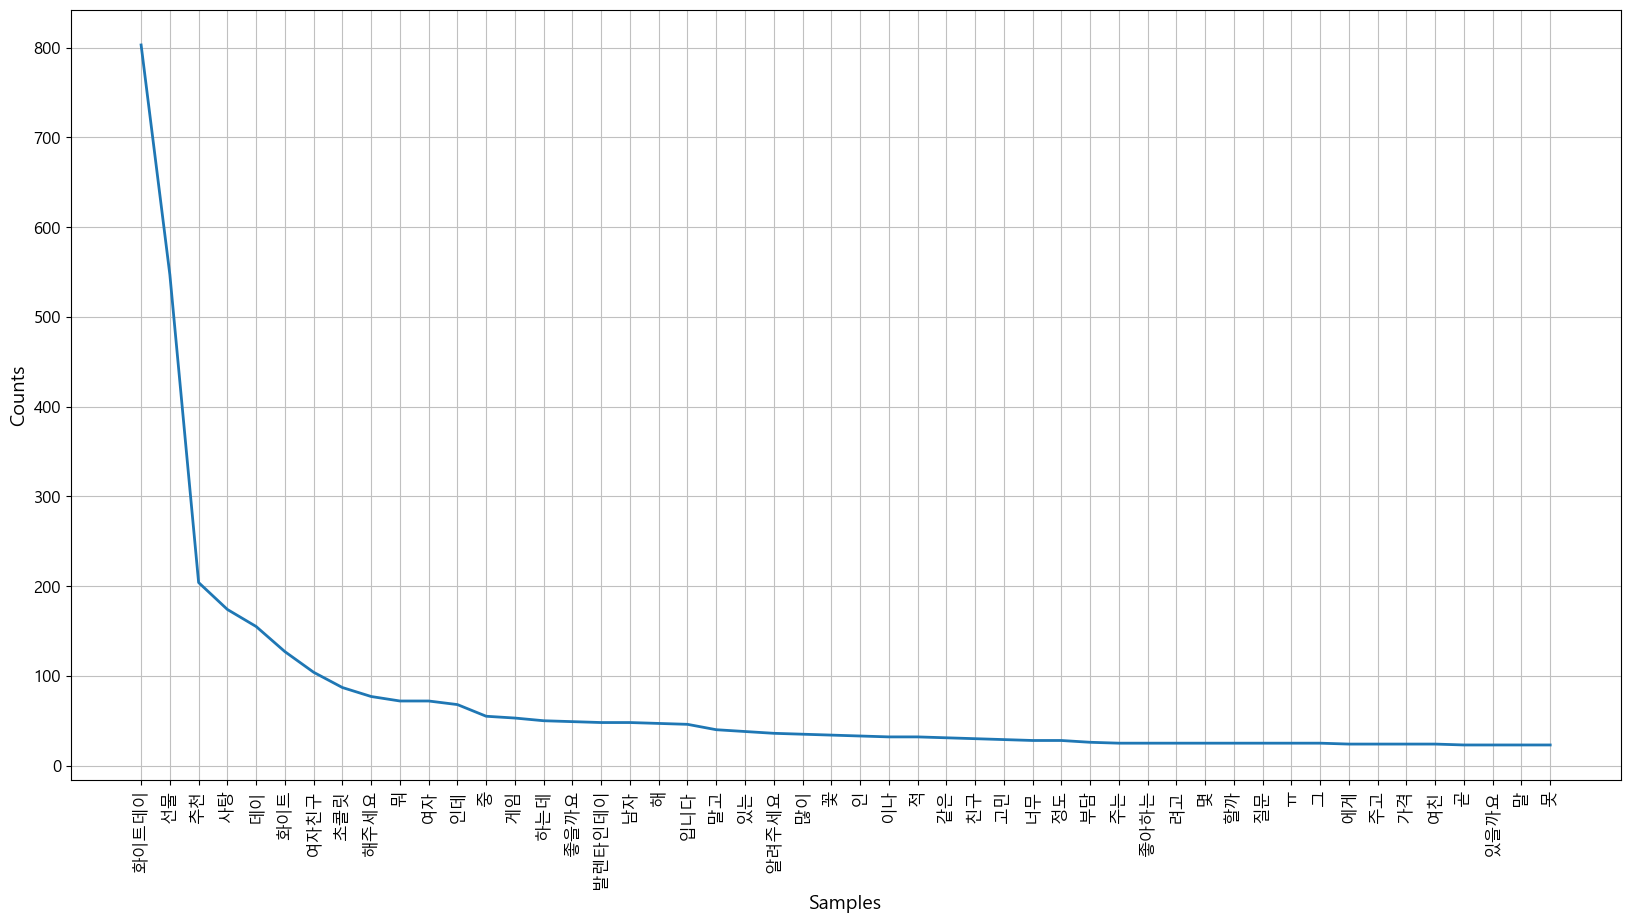

In [62]:
plt.figure(figsize = (20, 10))
ko.plot(50)
plt.show()

In [63]:
# 워드 클라우드
import pytagcloud

data = ko.vocab().most_common(101)

taglist = pytagcloud.make_tags(data, maxsize = 200)
for i in taglist :
    if i['tag'] == '화이트데이' :
        taglist.remove(i)
pytagcloud.create_tag_image(taglist, 'wordcloud_whiteday.png', size = (900, 600),
                           fontname = 'Korean', rectangular = False)
    

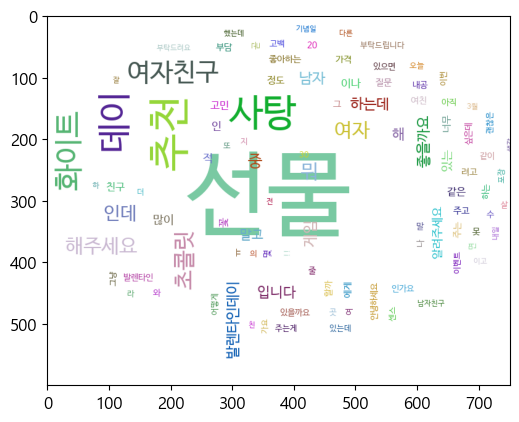

In [64]:
import matplotlib.pyplot
import matplotlib.image

img = matplotlib.image.imread('wordcloud_whiteday.png')
matplotlib.pyplot.imshow(img)
plt.show()

In [65]:
# word2vec 을 이용하기 위해서 설치
!pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   ---------------------------------------- 59.6/59.6 kB ? eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-

In [66]:
from gensim.models import word2vec

twitter = Twitter()
results = []
lines = present_candi_text

for line in lines :
    malist = twitter.pos(line, norm = True, stem = True)
    r = []
    # 조사, 어미, 구두점을 제거하고 r에 추가
    for word in malist :
        if not word[1] in ['Josa', 'Eomi', 'Punctuation'] : 
            r.append(word[0])
    # 앞 뒤에 있는 좌우 공백 제거
    r1 = (' '.join(r)).strip()
    results.append(r1)

In [68]:
print(results)

['화이트데이 이벤트 20 대 초반 커플 처음 맞다 화이트데이 이벤트 알다', '화이트데이 띄어쓰기 맞춤법 밸런타인데이 붙이다 쓰다 화이트데이 화이트 데이 ㅠㅠ', '화이트데이 초콜릿 주다 아니다 사탕 주다 화이트데이 초콜릿 주다 가요 아니다 초콜릿 주다 가요 발렌타인데이 초콜릿 주다 알 있다 화이트데이 자다 모르다 3/14 화이트데이 초콜릿 주다 건지다 사탕 주다 건지다 알다', '화이트데이 선물 벌써 이번 화이트데이 다음주 이다 발렌타인데이 여자친구 수제 과일 초콜릿 받다 곧 화이트데이 다가오다 뭘 사다 되다 모르다 지금 현재 고등학생 부담 되다 않다 만 선물 추천 부탁 드리다 저 간식 쪽 생각 하다 보다', '군인 남친 화이트데이 군대 있다 남친 화이트데이 선물 보내다 싶다 뭐 좋다 그리고 카카오 선물 버내 배송 되다', '발렌타인데이 화이트 데이 차이 발렌타인 데이 화이트 데이 차이점 뭐죵 여자 남자 주다 남자 여자 주다 차이 가용 그렇다 어느 날 여자 주다 어떻다 날 남자 주다 가요', '여자친구 화이트데이 선물 추천 저 고등학생 3 학년 이다 곧 화이트데이 여자친구 선물 주다 싶다 화장품 너무 흔하다 같다 기억 남다 선물 추천 좀 해주다 볼때 제 생각나다 선물 좋다', '화이트데이 선물 추천 좋아하다 학교 선배 화이트데이 날 선물 주다 싶다 고등학교 여학생 좋아하다 한 가격 부담 않다 선물 뭐 있다 시간 많이 남다 하다 드리다 되다 모르다 좋아하다 모르다', '화이트데이 후배 선물 내일 화이트데이 잖다 그래서 작년 친하다 지내다 후배 여동생 소소하다 선물 아니다 선물 주다 어떻다 주다 좋다 뭐 챙기다 좋아하다 성격 고민 ㅠㅠ 둘 다 고등학생 하다 살 차이 나다 제 3 개월 째 짝사랑 중 ㅎ', '화이트데이 오늘 화이트데이 네 오늘 여자 선물 받다 날 ㅋㅋ 저 받다 ㅠㅠ 근데 남친 없다 ㅋㅠ 여러분 오늘 받다 예정', '화이트데이 선물 여자 들 사탕 더 좋아하다 초콜릿 더 좋아하다 사람 다르다 화이트데이 날 좋아하다 선배 님 드리다 추천 부탁드리다',

In [75]:
# Word2vec 적용
data_file = 'whitedate.data'

with open(data_file, 'w', encoding = 'utf-8') as fp :
    fp.write('\n'.join(results))
    data = word2vec.LineSentence(data_file)
    
# sg 가 0이면 CBOW 1이면 Skip-Gram
model = word2vec.Word2Vec(data, vector_size = 200, window = 10,
                         min_count = 2, sg = 1)

# 연관된 단어 확인 - 기본적으로 10개
# 한 화이트데이 싶다 / 이렇게 단어와 가까이 있는 단어를 찾아주는 것
model.wv.most_similar(positive = '초콜릿')

[('발렌타인데이', 0.997),
 ('더', 0.997),
 ('수제', 0.996),
 ('발렌타인', 0.996),
 ('짝남', 0.996),
 ('가요', 0.996),
 ('날', 0.996),
 ('주다', 0.995),
 ('사탕', 0.995),
 ('실질', 0.995)]

## 텍스트 데이터를 이용한 연관 규칙 분석

In [76]:
!pip  install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=3c38b8a503e7ab258357a1812b7d13c0c9080191ad8cc034630271be64fe63c7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [77]:
# 데이터 읽어오기
df = pd.read_csv('data_ML/tweet_temp.csv')
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


In [100]:
# 한글만 추출
import re

def text_cleansing(text) :
    hangul = re.compile('[^ㄱ-ㅣ 가-힣]') 
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['tweet_text'].apply(lambda x : text_cleansing(x))
df.head()

,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


In [101]:
# 한국어 불용어 사전 만들기 - https://www.ranks.nl/stopwords/korean
with open('data_nlp/korean_stopwords.txt', encoding = 'utf8')  as f :
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [102]:
# 문자열 대입 받아서 명사만 추출하고 1글자는 제거하고 불용어도 제거해서 리턴하는 함수
from  konlpy.tag import Okt

def get_nouns(x) :
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한 글자 제거
    nouns = [noun for noun in  nouns if len(noun) >1]
    
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

df['nouns'] = df['ko_text'].apply(lambda x : get_nouns(x))
print(df.head())

# 연관 규칙 분석을 하고자 할때는 데이터가 리스트 형태로 만들어지면 됩니다.
# 상품 거래 연관 규칙 분석을 하고자 할 때 구매한 상품 목록을 list 로 만들면 됩니다.
# ['사과', '배', '한라봉']

               created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...   
2  2019-04-01 10:49:33  RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...   
3  2019-04-01 10:49:03                  귀여워💜 #손흥민 https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...   

                                             ko_text  \
0                                                      
1    트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스     
2    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...   
3                                           귀여워 손흥민    
4    경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...   

                                               nouns  
0                                                 []  
1  [트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국...  
2                                  

In [106]:
# 연관 규칙 분석
from apyori import apriori

transcations = [['사과', '배', '맥주'], ['사과', '한라봉'],
               ['과자', '콜라']]

results = list(apriori(transcations, max_length = 2))
for result in results :
    print(result)

RelationRecord(items=frozenset({'과자'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'과자'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'맥주'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'맥주'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'배'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'배'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'사과'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'사과'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'콜라'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'콜라'}), confidence=0.3333333333333333, lift=1.0)

In [110]:
# 읽어온 데이터에 연관규칙 분석 적용
transcations = df['nouns'].tolist()

#비어 있는 list를 제거
transcations = [transcation for transcation in transcations if transcation]
print(transcations)

[['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '모델', '기용', '출처', '한국', '경제', '네이버', '뉴스'], ['손흥민', '말씀'], ['손흥민'], ['경남', '도민', '일보', '프로축구', '연맹', '경기장', '선거운동', '손흥민', '영국', '관중', '인종차별', '행위', '보고', '축구장', '선거운동', '규정', '위반', '이야기'], ['선택', '손흥민', '축구'], ['토트넘', '골수팬', '승부사', '제일', '선수', '손흥민', '입다'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['안녕하십니까', '손흥민', '트위터', '매우', '오늘', '경기도', '관심'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['출국', '손흥민'], ['출국', '손흥민'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['긴급', '속보', '하리보', '신제품', '손흥민', '개시', '하리보', '신제품', '샤인', '가장', '먼저', '보고', '팔로우', '알림', '설정', '두기', '하리보', '신제품'], ['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '

In [113]:
results = list(apriori(transcations, max_length = 2,
                      min_support = 0.1, min_confidence = 0.2, min_lift =  5))
for result in results :
    print(result)

RelationRecord(items=frozenset({'게임', '국가대표팀'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'금메달', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'게임', '모습'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'게임', '아시아'}), support=0.14285714285714285, ordere

In [133]:
# 연관 규칙 분석한 결과를 DataFrame으로 변환
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns = columns)

for result in results:
    items = [x for x in result.items]
    if len(items) > 1:
        row = [items[0], items[1], result.support]
        
    series = pd.Series(row, index=network_df.columns)
    network_df.loc[len(network_df)] = series
    
print(network_df)
# 앞에 min_lift=5로 올리지 않을 시, items가 1개만 있는 것 때문에 오류 발생

    source target support
0       게임  국가대표팀   0.143
1      금메달     게임   0.143
2       게임     모습   0.143
3       게임    아시아   0.143
4       게임     의조   0.143
..     ...    ...     ...
109     추첨     해당   0.143
110     추첨     홍보   0.143
111     통해     해당   0.143
112     통해     홍보   0.143
113     해당     홍보   0.143

[114 rows x 3 columns]


## 네트워크 시각화

In [119]:
#데이터를 전부 추출
tweet_corpus = "".join(df["ko_text"].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [122]:
# 한글 형태소 분석을 수행한 수 등장 횟수 구하기
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
#1글자 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


In [123]:
# 단어와 등장 횟수를 가지고 DataFrame을 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns = ['node', 'nodesize'])
print(node_df)

    node  nodesize
0     트릴        35
1     리온        35
2     축구       140
3   국가대표        35
4    손흥민       560
..   ...       ...
73    먼저        35
74   팔로우        35
75    알림        35
76    설정        35
77    두기        35

[78 rows x 2 columns]


In [125]:
# nodesize 가 50이상인  데이터만 추출
node_df = node_df[node_df['nodesize'] >= 50]
print(node_df)

     node  nodesize
2      축구       140
4     손흥민       560
5      선수       140
7      모델       105
10     한국       105
21   선거운동        70
26     보고        70
37     계정        70
38     지기        70
39     실수        70
40     삭제        70
41     다시        70
42    하리보       245
43     홍보        70
44     발탁        70
45     기념        70
46     해당        70
47     추첨        70
48     통해        70
49    골드바        70
50     기간        70
57     출국        70
58  국가대표팀        70
59    조현우       140
60    황의조       140
61    아시아        70
62     게임        70
63    금메달       140
64     모습        70
65     의조        70
66     진짜        70
69    신제품       105


In [124]:
!pip install network

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3143 sha256=e1ee1a59a7e8b42bcfe8bb7f76670160404ac30d274030debd4f129f9c025e95
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3a\9a\a4\341d3b109494a43a5cdd444ca83be3a4bfe8c1267ad9f85332
Successfully built network


In [ ]:
import networkx as nx

# 이미지 크기 설정
plt.figure(figsize = (25, 25))

# 그래프 인스턴스 생성
G = nx.Graph()

#노드 추가
for index, row in node_df.iterrows() :
    G.add_node(row['node'], nodesize = row['nodesize'])
    
# 간선 추가
for index, row in network_df. iterrows() :
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 디자인을 설정
pos = nx.spring_layout(G, k = 0.6, iterations =50)
sizes = [G.nodes[node]['nodesize'] * 25 for node in G]
nx.draw(G, pos = pos, node_size = sizes)

# 레이블 출력-한글의 경우는 한글 폰트 선택
nx.draw_networkx_labels(G, pos=pos, font_family = 'Malgun Gothic', font_size = 25)

ax = plt.gca()
plt.show()

# TMDB 영어 데이터 셋

In [135]:
# 데이터 읽어오기
movies =pd.read_csv('data_nlp/tmdb_5000_movies.csv/tmdb_5000_movies.csv')
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [136]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

#genres와 keywords는 하나의 문자열이 아니고 list 입니다.
#csv파일을 만들려고 list를 문자열로 만들기 위해서 ""로 감싸는 형태로 만들었습니다.
#파이썬이나 자바스크립트에서는 json포맷의 문자열로 데이터를 표현합니다.
#파이썬이나 자바스크립트에서는 문자열로 만들어진 데이터를 원래의 자료형으로 되돌리는 API가 제공됩니다.
#파이썬에서는 ast 모듈의 literal_eval이라는 함수를 이용하면 됩니다.
# "[a, b, c]"    >     literal_eval     >     [a, b, c]

movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."


### 데이터 변환

In [137]:
from ast import literal_eval

#딕셔너리의 리스트 형태로 변환    >    [dic1, dic2 ...]로 변환
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

#딕셔너리의 name에 해당하는 데이터만 추출해서 리스트로 변환
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])

#데이터 확인
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."


### 피처 벡터 행렬 생성

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

# list의 데이터를 공백으로 구분한 문자열로 생성
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))

# 피처 백터화 수행
count_vect = CountVectorizer(min_df = 0.0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [142]:
# 장르의 코사인 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim[:1])

[[1.    0.596 0.447 ... 0.    0.    0.   ]]


In [143]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


In [151]:
#기반 데이터인 movies df DataFrame 
#레코드별 장르 코사인 유사도 인덱스를 가지고 있는 genre_sim_sorted_ind
#고객이 선정한 추천 기준이 되는 영화 제목
#추천할 영화 건수를 입력
#추천 영화 정보를 가지는 DataFrame을 반환
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [153]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [154]:
# 가중 평점 부여
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print("C: ", C)
print("m: ", m)

C:  6.092171559442016
m:  370.1999999999998


In [156]:
def weighted_vote_average(record) :
    v = record['vote_count']
    R = record['vote_average']
    
    return (v / (v+m)) *R + (m /(v+m)) * C

In [157]:
movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis = 1)
print(movies_df[['title', 'vote_average', 'vote_count', 'weighted_vote']][:10])(v / (v+m)) *R + (m /(v+m)) * C

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   
5                              Spider-Man 3           5.9        3576   
6                                   Tangled           7.4        3330   
7                   Avengers: Age of Ultron           7.3        6767   
8    Harry Potter and the Half-Blood Prince           7.4        5293   
9        Batman v Superman: Dawn of Justice           5.7        7004   

   weighted_vote  
0          7.166  
1          6.839  
2          6.284  
3          7.541  
4          6.099  
5          5.918  
6          7.269  
7          7.237  
8          7.315  
9     

In [158]:
# 가중 평점이 높은 영화 추천하기
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    # 추천 개수를 2배로 늘림
    similar_indexes = sorted_ind[title_index, :(top_n * 2)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending = False)[:top_n]

In [159]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending = False)

,title,vote_average,vote_count
3337,The Godfather,8.4,5893
2731,The Godfather: Part II,8.3,3338
1847,GoodFellas,8.2,3128
1663,Once Upon a Time in America,8.2,1069
3866,City of God,8.1,1814
883,Catch Me If You Can,7.7,3795
281,American Gangster,7.4,1502
4041,This Is England,7.4,363
1243,Mean Streets,7.2,345
1149,American Hustle,6.8,2807
